# The Data Incubator Challenge Project Proposal 
Mesut Yilmaz

_07/29/2019_

### Analysis of Winning Nobel Prize Statistics

### Introduction

Since 1901, the most prestigious prize in academics, named after Alfred Nobel, the inventor of dynamite, is being given internationally to successful people who contribute to world’s peace, literature, and scientific fields of studies of economics, chemistry, medicine, and physics for their outstanding work [1]. The main goal of the prize is to promote intellectual, technological, and social improvements in all or some of these fields. Especially in academics, there is a huge number of researchers endeavoring to achieve scientific breakthroughs and leave their impact on this world. As we all know, some of the scientists harvest their efforts with a Nobel prize. On the other hand, the number of years scientists study or start contributing to the academic community by publishing papers differs; some are lucky to reach this honor after a few years and some others need to persevere in their efforts, while many others’ work is appreciated after they pass away. As the core facility of scientific studies, universities and research institutions are the main contributors to scientific inventions, hence being foundations to host Nobel-winning people. Therefore, taking a close look at these foundations’ Nobel prize-winning statistics can be beneficial to understand how much academic effort is being spent and appreciated by the world.

### Project Overview

In this project, my first goal is to evaluate the amount of study required to get a Nobel prize for a researcher. To do this, I’m going to count the years each scientist has been publishing until they get the prize. The number of years can be a good parameter to understand the distribution of Nobel prize nomination and the required effort.
My second goal is to carry out an analysis of how the number of prizes and publications correlate for universities or research institutions. From this analysis, we can derive information such as if it is necessary to publish more to get a chance to win Nobel Prize and if there is a distribution of top foundations separating from others in means of total prizes.


### Methods

#### Data

I obtained data from Harvard University [2], which consisted of 
1.	Chemistry publication record
2.	Medicine publication record
3.	Physics publication record
4.	Prize-winning paper record

This dataset includes information such as laureates’ prize year, affiliation, publication record, the title of prize-winning publication, and prize year. In the future, more if more information can be found such as laureates’ country and research keywords and combine with this data set for more in-depth analysis of Nobel Prize statistics.
#### Tools
I used Python and Jupyter for data analysis and illustrations.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

folder='project/data/'
# combining all fields' publication record data in a single file
pubrecords=pd.DataFrame()

data=pd.read_csv(folder + 'Chemistry publication record.csv',encoding="ISO-8859-1", header=0)
data['Field']='Chemistry'
pubrecords=pubrecords.append(data)

data=pd.read_csv(folder + 'Physics publication record.csv',encoding="ISO-8859-1", header=0)
data['Field']='Physics'
pubrecords=pubrecords.append(data)

data=pd.read_csv(folder + 'Medicine publication record.csv',encoding="ISO-8859-1", header=0)
data['Field']='Medicine'
pubrecords=pubrecords.append(data)
pubrecords.head()

,Laureate ID,Laureate name,Prize year,Title,Pub year,Paper ID,DOI,Journal,Affiliation,Is prize-winning paper,Field
0,20001,"stoddart, j",2016,a molecular shuttle,1991.0,1.976039e+09,10.1021/ja00013a096,journal of the american chemical society,northwestern university,YES,Chemistry
1,20001,"stoddart, j",2016,chemical synthesis of nanostructures,1993.0,1.963538e+09,10.1557/PROC-330-57,mrs proceedings,northwestern university,NO,Chemistry
2,20001,"stoddart, j",2016,formation and x ray crystal structure of pt h2...,1981.0,1.963552e+09,10.1039/C39810000851,journal of the chemical society chemical commu...,northwestern university,NO,Chemistry
3,20001,"stoddart, j",2016,single walled carbon nanotubes under the influ...,2005.0,2.095637e+09,10.1002/smll.200400070,small,northwestern university,NO,Chemistry
4,20001,"stoddart, j",2016,synthesis of medium heterocyclic rings from 6 ...,1974.0,2.095679e+09,10.1016/S0008-6215(00)82105-9,carbohydrate research,northwestern university,NO,Chemistry


### Data Analyses
For the first analysis, I’m interested in creating a time distribution of the laureates’ years of study/publication years before they reach the prize. Within this time period, I needed to pick an appropriate time slot to observe a healthy distribution of the number of prizes and publication years. To do this, I first I grouped the laureates by the publication year and prize years, and calculated how many years each published papers, the maximum number being my range of years. The first figure shows that as the numbers of years a scientist conducts increases, the chance of getting a Nobel Prize also increases, showing a nearly Gaussian distribution, with the peaks at 20-25 years, where more than 60 of the scientists got their prizes. Even though there is a sharp decline in the chance of getting a prize after this time period, it increases dramatically to nearly 50 prizes at the 40-45 years time slot. Considering an average lifespan of 75 years and starting academics in mid-twenties, a considerable number of scientists were not able to witness their award, indicated at the time slots bigger than 50-55 years. While it seems very unlikely to have been awarded in or near the years a scientist have studied, sometimes it took as much as more than 100 years for the world to appreciate the work they have done, which can be an indicator of motivation for a scientist for not giving up hard work. 


In [2]:
# finding the publication records before the prize announcement year
pubrecords_bfr_prz=pubrecords[pubrecords['Pub year']<pubrecords['Prize year']]

In [3]:
pubyear=pubrecords_bfr_prz.groupby(['Laureate ID'])['Pub year']
przyear=pubrecords_bfr_prz.groupby(['Laureate ID'])['Prize year']
pub_range=(przyear.max()-pubyear.min()+1).sort_values()


In [4]:
# creating distribution of time slots laureates published papers before the prize
lauraetes_distrb=[[],[]]
timeslot=5
for i in range(int(pub_range.max()/timeslot)+1):
    lauraetes_distrb[0].append(pub_range[(pub_range>(i*timeslot))&(pub_range<((i+1)*timeslot))].count())
    lauraetes_distrb[1].append(str(timeslot*i)+'-'+str(timeslot*(i+1)))
lauraetes_distrb=pd.DataFrame({'laureates_numbers':lauraetes_distrb[0], 'timeslots':lauraetes_distrb[1]})

Text(0, 0.5, 'Number of Nobel Laureates')

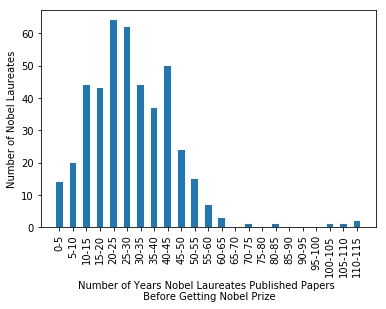

In [5]:
#plotting the first figure
plt.bar(lauraetes_distrb['timeslots'],lauraetes_distrb['laureates_numbers'], align='center', alpha=1, width=0.5)
plt.tick_params(axis='x', rotation=90)
plt.xlabel('Number of Years Nobel Laureates Published Papers \n Before Getting Nobel Prize') 
plt.ylabel('Number of Nobel Laureates')
 

For the second data analysis, firstly, I grouped the foundations according to the total number of papers their laureates published. Secondly, I calculated the number of prizes foundations were affiliated with and sorted the data based on these numbers. For the figure, I plotted a scattered distribution of universities, where the top ten universities were labeled. This figure shows there is a correlation between the number of prizes and publications, with exceptions of some institutions. For example, for universities like Harvard and Stanford, we observed this correlation, while Yale University and Columbia University showed less number of publications compared to total prizes they obtained. On the other hand, there are obvious separations of clusters of foundations in means of prize-count and publication-count. As a unique example, Harvard University, with a great number of prizes and publications, stays away from a big cluster of foundations. Within them forms also two subsets of clusters: cluster containing top-10 foundations based on the prize and publication-counts, and a cluster of foundations with fewer prizes and publications. For a scientist, it can be a useful illustration for considering which university or institution to work at. As the number of publications does not always reflect the quality of research being conducted at a university, the ratio of prizes per publication might do, where it is true for Cambridge University.

In [6]:
# for the second figure
univ_nobels_papers=pd.DataFrame()
univ_nobels_papers['University_Institute']=pubrecords['Affiliation'].value_counts().index

# find number of publications for each university/institution
univ_nobels_papers['Number_of_publications']=pubrecords['Affiliation'].value_counts().values
univ_nobels_papers=univ_nobels_papers.sort_values('University_Institute')

# find number of prizes for each university/institution
x=pubrecords.sort_values('Affiliation')
univ_nobels_papers['Number_of_Nobels']=x.groupby(['Affiliation','Prize year'])['Affiliation'].unique().value_counts().sort_index().values 
univ_nobels_papers=univ_nobels_papers.sort_values('Number_of_Nobels', ascending=False)


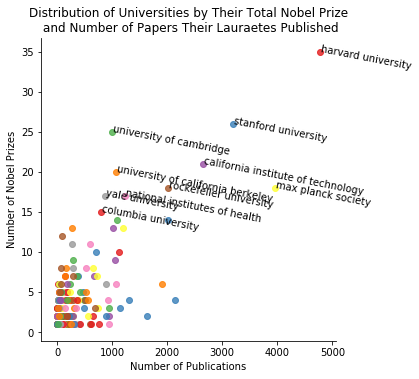

In [8]:
## plotting the second figure
p1=sn.lmplot( x="Number_of_publications", y="Number_of_Nobels", data=univ_nobels_papers, fit_reg=False, hue='University_Institute', legend=False, palette="Set1")

plt.title('Distribution of Universities by Their Total Nobel Prize\n and Number of Papers Their Lauraetes Published')
# Setting x-axis label
plt.xlabel('Number of Publications')
# Setting y-axis label
plt.ylabel('Number of Nobel Prizes')
for line in range(0,10):
     plt.text(univ_nobels_papers.Number_of_publications.iloc[line]+0.2, 
     univ_nobels_papers.Number_of_Nobels.iloc[line], 
     univ_nobels_papers.University_Institute.iloc[line], horizontalalignment='left', size='medium', color='black', 
     weight='light', rotation=-11)

### Concluding Remarks and Future Study
Nobel prize nominations show how humanity is evolving each year either socially, technologically, or intellectually and are worthy of respect in the scientific community. In this project, the evaluation of Nobel prize-winning statistics is performed for both research foundations and researchers. It can be used to understand the trends in scientific studies and scientific behavior of top research foundations. 

If I am selected as a data science fellow, I would like to continue analyzing this data and enrich it with information from different sources. To better assess the quality of research being done at research foundations, I can obtain the impact factor of journals each laureate published and accordingly correlate the total impact factor with the number of prizes each university has. In addition, each laureate’s country information can be found and award statistics for the countries can also be obtained. Combining with some other information like the gross domestic product (GDP) per capita of countries, I can compare which country uses its economy better for scientific success if there is any correlation between the number of Nobel prizes. Besides, the trends in scientific studies can be obtained by searching the index of laureates’ papers or even the papers. To do this and other analyses, I look forward to equipping myself with more advanced tools like machine learning and artificial intelligence which can also predict future scientific trends in the world, a Nobel prize can be a strong baseline indicator.

### References:

[1]	https://www.sciencenewsforstudents.org/article/explainer-nobel-prize

[2]	https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/6NJ5RN)
